In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
from sklearn.manifold import TSNE


In [4]:
MCA = pd.read_csv("Mall_customers.csv")
MCA

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency
0,1,19,35,37,Male,43900,1
1,2,41,39,54,Female,64631,12
2,3,45,33,29,Male,48885,15
3,4,21,41,27,Female,50946,12
4,5,27,30,57,Male,44848,11
...,...,...,...,...,...,...,...
89995,89996,33,70,60,Male,35343,19
89996,89997,18,52,62,Male,39550,15
89997,89998,46,43,70,Male,80699,14
89998,89999,39,90,11,Male,80828,17


In [6]:
MCA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              90000 non-null  int64 
 1   Age                     90000 non-null  int64 
 2   Annual Income (k$)      90000 non-null  int64 
 3   Spending Score (1-100)  90000 non-null  int64 
 4   Gender                  90000 non-null  object
 5   Annual_Spend            90000 non-null  int64 
 6   Visit_Frequency         90000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ MB


In [8]:
MCA.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
Annual_Spend              0
Visit_Frequency           0
dtype: int64

In [10]:
median_annual_spend=MCA["Annual_Spend"].median()
mean_annual_spend=MCA["Annual_Spend"].mean()
print("Median of Annual_Spend: ",median_annual_spend)
print("Mean of Annual_Spend: ",mean_annual_spend)

Median of Annual_Spend:  49951.0
Mean of Annual_Spend:  49953.89133333333


In [12]:
MCA['Annual_Spend']=MCA['Annual_Spend'].fillna(median_annual_spend)
MCA.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
Annual_Spend              0
Visit_Frequency           0
dtype: int64

In [14]:
median_visit_frequency=MCA["Visit_Frequency"].median()
mean_visit_frequency=MCA["Visit_Frequency"].mean()
print("Median of Visit_Frequency: ",median_visit_frequency)
print("Mean of Visit_Frequency: ",mean_visit_frequency)

Median of Visit_Frequency:  12.0
Mean of Visit_Frequency:  11.546766666666667


In [16]:
MCA['Visit_Frequency']=MCA['Visit_Frequency'].fillna(median_visit_frequency)
MCA.isnull().sum()


CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
Annual_Spend              0
Visit_Frequency           0
dtype: int64

In [18]:
MCA[MCA.duplicated()]


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency


In [20]:
print(type(MCA))
print(MCA.shape)


<class 'pandas.core.frame.DataFrame'>
(90000, 7)


In [22]:
MCA.dtypes


CustomerID                 int64
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Gender                    object
Annual_Spend               int64
Visit_Frequency            int64
dtype: object

In [24]:
print(MCA.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender  \
0           1   19                  35                      37    Male   
1           2   41                  39                      54  Female   
2           3   45                  33                      29    Male   
3           4   21                  41                      27  Female   
4           5   27                  30                      57    Male   

   Annual_Spend  Visit_Frequency  
0         43900                1  
1         64631               12  
2         48885               15  
3         50946               12  
4         44848               11  


In [26]:
print(MCA.describe())


         CustomerID           Age  Annual Income (k$)  Spending Score (1-100)  \
count  90000.000000  90000.000000        90000.000000            90000.000000   
mean   45000.500000     34.940100           49.907667               49.735944   
std    25980.906451     11.168142           19.303641               23.597911   
min        1.000000     18.000000           15.000000                1.000000   
25%    22500.750000     26.000000           36.000000               33.000000   
50%    45000.500000     35.000000           50.000000               50.000000   
75%    67500.250000     43.000000           63.000000               66.000000   
max    90000.000000     83.000000          132.000000              100.000000   

        Annual_Spend  Visit_Frequency  
count   90000.000000     90000.000000  
mean    49953.891333        11.546767  
std     15010.007588         4.933628  
min        52.000000         1.000000  
25%     39850.750000         8.000000  
50%     49951.000000        12

In [28]:
print(MCA['Gender'].value_counts())


Gender
Female    47437
Male      42563
Name: count, dtype: int64


<Axes: >

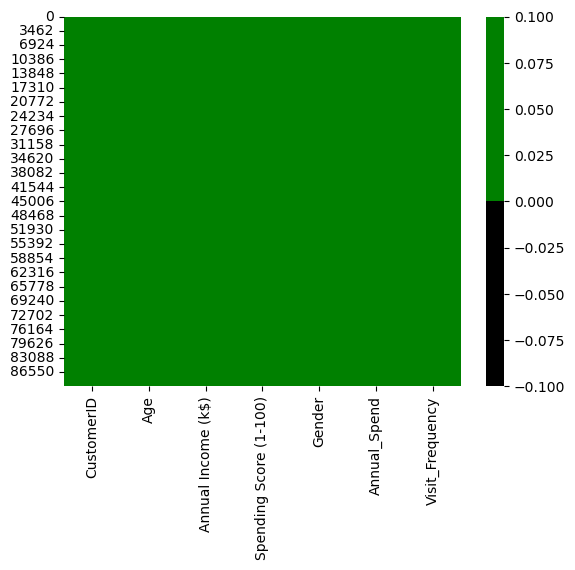

In [30]:
cols = MCA.columns
colours =['black', 'green']
sns.heatmap(MCA[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

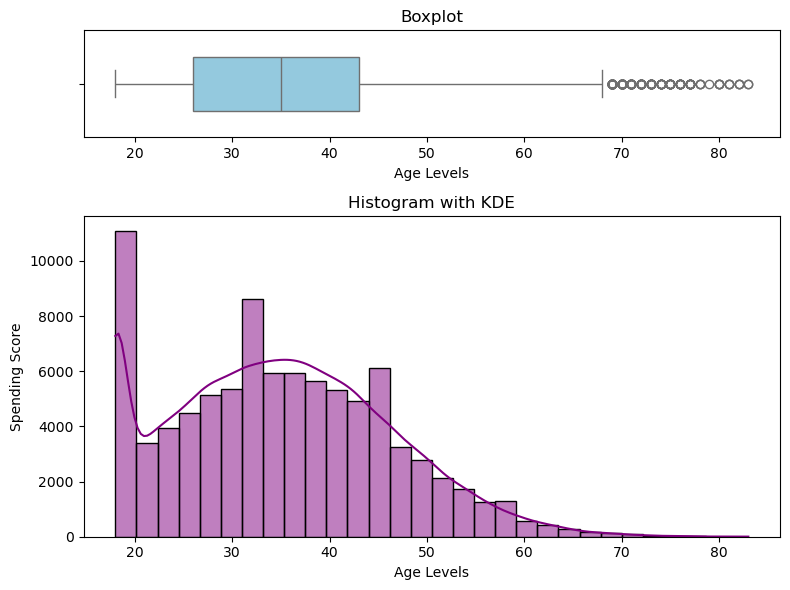

In [32]:
fig, axes = plt.subplots (2, 1, figsize= (8, 6), gridspec_kw={'height_ratios': [1, 3]})

#plot the boxplot in first (top) subplot
sns.boxplot (data=MCA ["Age"], ax=axes [0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title ("Boxplot")
axes[0].set_xlabel("Age Levels")

#plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(MCA["Age"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Age Levels")
axes[1].set_ylabel("Spending Score")
#Adjust layout for better spacing

plt.tight_layout()

#show the plot
plt.show()


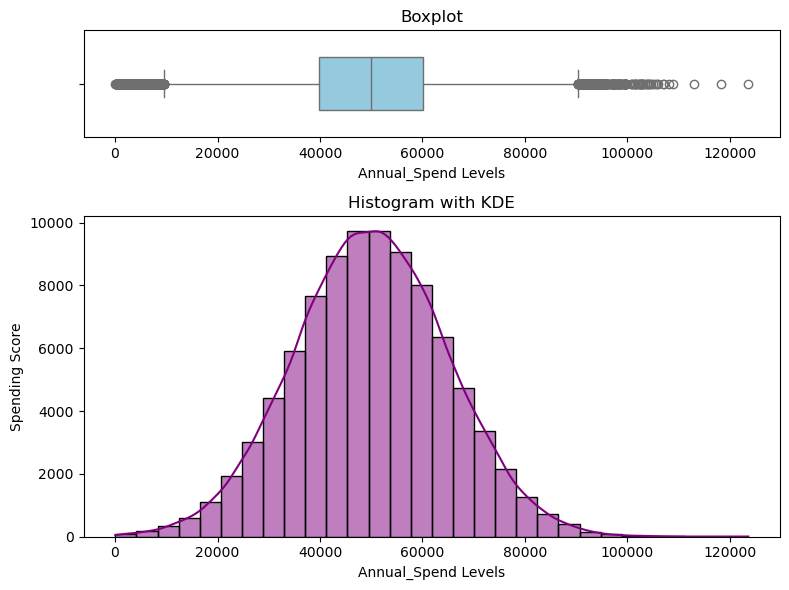

In [34]:
fig, axes = plt.subplots (2, 1, figsize= (8, 6), gridspec_kw={'height_ratios': [1, 3]})

#plot the boxplot in first (top) subplot
sns.boxplot (data=MCA ["Annual_Spend"], ax=axes [0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title ("Boxplot")
axes[0].set_xlabel("Annual_Spend Levels")

#plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(MCA["Annual_Spend"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Annual_Spend Levels")
axes[1].set_ylabel("Spending Score")
#Adjust layout for better spacing

plt.tight_layout()

#show the plot
plt.show()

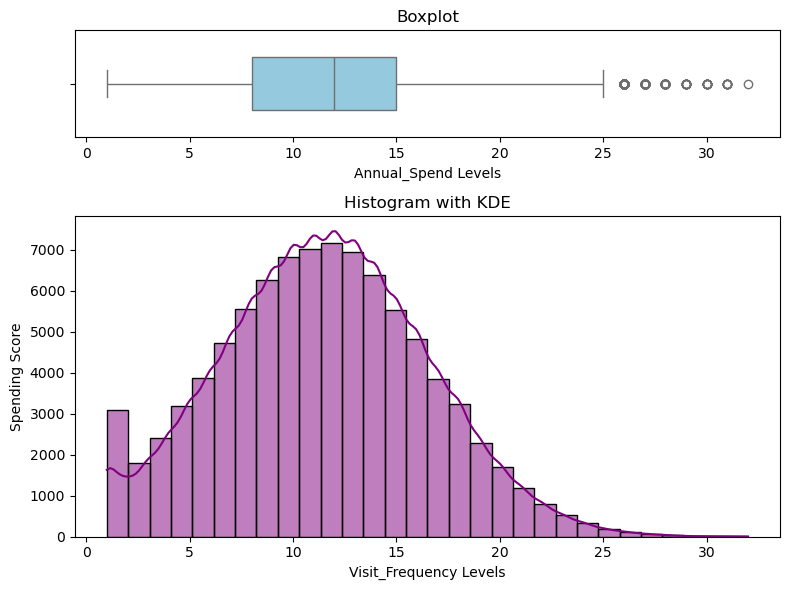

In [36]:
fig, axes = plt.subplots (2, 1, figsize= (8, 6), gridspec_kw={'height_ratios': [1, 3]})

#plot the boxplot in first (top) subplot
sns.boxplot (data=MCA ["Visit_Frequency"], ax=axes [0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title ("Boxplot")
axes[0].set_xlabel("Annual_Spend Levels")

#plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(MCA["Visit_Frequency"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Visit_Frequency Levels")
axes[1].set_ylabel("Spending Score")
#Adjust layout for better spacing

plt.tight_layout()

#show the plot
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans


In [40]:
MCA = pd.read_csv("Mall_customers.csv")
MCA

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency
0,1,19,35,37,Male,43900,1
1,2,41,39,54,Female,64631,12
2,3,45,33,29,Male,48885,15
3,4,21,41,27,Female,50946,12
4,5,27,30,57,Male,44848,11
...,...,...,...,...,...,...,...
89995,89996,33,70,60,Male,35343,19
89996,89997,18,52,62,Male,39550,15
89997,89998,46,43,70,Male,80699,14
89998,89999,39,90,11,Male,80828,17


In [42]:
MCA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              90000 non-null  int64 
 1   Age                     90000 non-null  int64 
 2   Annual Income (k$)      90000 non-null  int64 
 3   Spending Score (1-100)  90000 non-null  int64 
 4   Gender                  90000 non-null  object
 5   Annual_Spend            90000 non-null  int64 
 6   Visit_Frequency         90000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ MB


In [44]:
MCA1 = MCA.iloc[:,1:]
MCA1

,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency
0,19,35,37,Male,43900,1
1,41,39,54,Female,64631,12
2,45,33,29,Male,48885,15
3,21,41,27,Female,50946,12
4,27,30,57,Male,44848,11
...,...,...,...,...,...,...
89995,33,70,60,Male,35343,19
89996,18,52,62,Male,39550,15
89997,46,43,70,Male,80699,14
89998,39,90,11,Male,80828,17


In [46]:
cols = MCA1.columns
cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender',
       'Annual_Spend', 'Visit_Frequency'],
      dtype='object')

In [48]:
MCA1 = pd.get_dummies(MCA1, drop_first=True)
MCA1

,Age,Annual Income (k$),Spending Score (1-100),Annual_Spend,Visit_Frequency,Gender_Male
0,19,35,37,43900,1,True
1,41,39,54,64631,12,False
2,45,33,29,48885,15,True
3,21,41,27,50946,12,False
4,27,30,57,44848,11,True
...,...,...,...,...,...,...
89995,33,70,60,35343,19,True
89996,18,52,62,39550,15,True
89997,46,43,70,80699,14,True
89998,39,90,11,80828,17,True


In [50]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()  # Define the scaler

# Assuming MCA1 is a DataFrame
cols = MCA1.columns  # Get updated column names
scaled_MCA_df = pd.DataFrame(scaler.fit_transform(MCA1), columns=cols)  # Apply scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_MCA_df = pd.DataFrame(scaler.fit_transform(MCA1),columns = cols)
scaled_MCA_df

,Age,Annual Income (k$),Spending Score (1-100),Annual_Spend,Visit_Frequency,Gender_Male
0,-1.427291,-0.772277,-0.539709,-0.403326,-2.137742,1.055705
1,0.542609,-0.565061,0.180697,0.977827,0.091867,-0.947235
2,0.900773,-0.875885,-0.878724,-0.071212,0.699942,1.055705
3,-1.248209,-0.461453,-0.963478,0.066097,0.091867,-0.947235
4,-0.710964,-1.031296,0.307828,-0.340168,-0.110825,1.055705
...,...,...,...,...,...,...
89995,-0.173718,1.040863,0.434959,-0.973415,1.510709,1.055705
89996,-1.516832,0.108391,0.519712,-0.693134,0.699942,1.055705
89997,0.990314,-0.357845,0.858727,2.048319,0.497250,1.055705
89998,0.363527,2.076943,-1.641508,2.056913,1.105325,1.055705


In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
scaled_MCA_df = imputer.fit_transform(scaled_MCA_df)



In [56]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_MCA_df)

KMeans(n_clusters=3, random_state=0)

In [58]:
clusters_new.labels_


array([2, 0, 2, ..., 1, 2, 2])

In [60]:
set(clusters_new.labels_)


{0, 1, 2}

In [62]:
MCA['clusterid_new']  = clusters_new.labels_
MCA

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,clusterid_new
0,1,19,35,37,Male,43900,1,2
1,2,41,39,54,Female,64631,12,0
2,3,45,33,29,Male,48885,15,2
3,4,21,41,27,Female,50946,12,0
4,5,27,30,57,Male,44848,11,1
...,...,...,...,...,...,...,...,...
89995,89996,33,70,60,Male,35343,19,1
89996,89997,18,52,62,Male,39550,15,1
89997,89998,46,43,70,Male,80699,14,1
89998,89999,39,90,11,Male,80828,17,2


In [64]:
MCA.sort_values(by = "clusterid_new")


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Annual_Spend,Visit_Frequency,clusterid_new
72607,72608,38,15,41,Female,47155,18,0
41622,41623,54,35,28,Female,48624,10,0
41623,41624,29,56,100,Female,43404,9,0
41624,41625,21,40,52,Female,56669,7,0
41625,41626,32,41,46,Female,63830,12,0
...,...,...,...,...,...,...,...,...
48335,48336,24,73,47,Male,48327,10,2
48334,48335,18,28,55,Male,36173,11,2
48333,48334,35,60,16,Male,37996,12,2
48404,48405,39,15,28,Male,41843,17,2


In [66]:
MCA = pd.get_dummies(MCA, drop_first=True)  # One-hot encoding
MCA

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual_Spend,Visit_Frequency,clusterid_new,Gender_Male
0,1,19,35,37,43900,1,2,True
1,2,41,39,54,64631,12,0,False
2,3,45,33,29,48885,15,2,True
3,4,21,41,27,50946,12,0,False
4,5,27,30,57,44848,11,1,True
...,...,...,...,...,...,...,...,...
89995,89996,33,70,60,35343,19,1,True
89996,89997,18,52,62,39550,15,1,True
89997,89998,46,43,70,80699,14,1,True
89998,89999,39,90,11,80828,17,2,True


In [68]:
MCA.iloc[:,1:].groupby("clusterid_new").mean()


,Age,Annual Income (k$),Spending Score (1-100),Annual_Spend,Visit_Frequency,Gender_Male
clusterid_new,,,,,,
0,34.945463,50.044123,49.744308,49984.524918,11.563580,0.000000
1,36.329083,50.387221,68.767686,49152.553119,12.083924,0.999952
2,33.573219,49.139383,31.150429,50668.219169,10.985704,1.000000


In [70]:
MCA[MCA['clusterid_new']==0]


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Annual_Spend,Visit_Frequency,clusterid_new,Gender_Male
1,2,41,39,54,64631,12,0,False
3,4,21,41,27,50946,12,0,False
5,6,30,59,24,69542,5,0,False
8,9,30,52,81,53944,9,0,False
10,11,52,61,75,55987,11,0,False
...,...,...,...,...,...,...,...,...
89980,89981,28,22,58,83702,17,0,False
89983,89984,28,27,84,56919,15,0,False
89984,89985,38,85,74,57453,15,0,False
89988,89989,26,80,62,27607,13,0,False


[539999.9999999986, 480570.62732372864, 421634.7820844367, 389722.11123269657, 370747.6592254496, 347559.03296172805, 332747.4220633453, 316454.1209947087, 303930.42282407195, 291118.04693579796, 280230.1441464843, 270405.98496674985, 263730.5797065337, 257663.71918434452, 252346.72372466567, 245336.71021099584, 239288.97758875618, 233088.01683639846, 227655.9192959179]


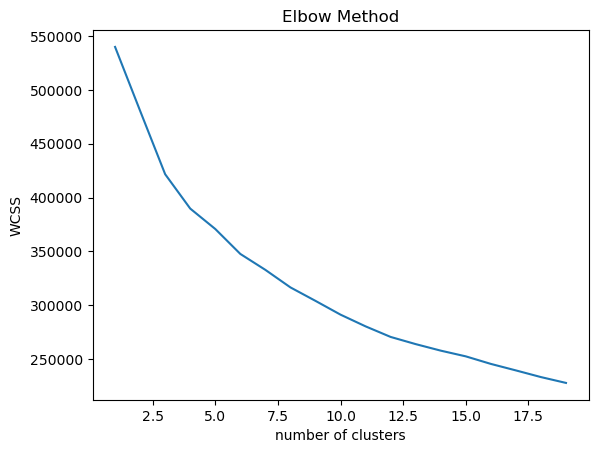

In [72]:
wcss = []
for i in range(1, 20):

    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_MCA_df)
    #kmeans.fit(Univ)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
print(wcss)
plt.ylabel('WCSS')
plt.show()

In [74]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_MCA_df, \
                         clusters_new.labels_, metric='euclidean')
score

0.13451900661753186

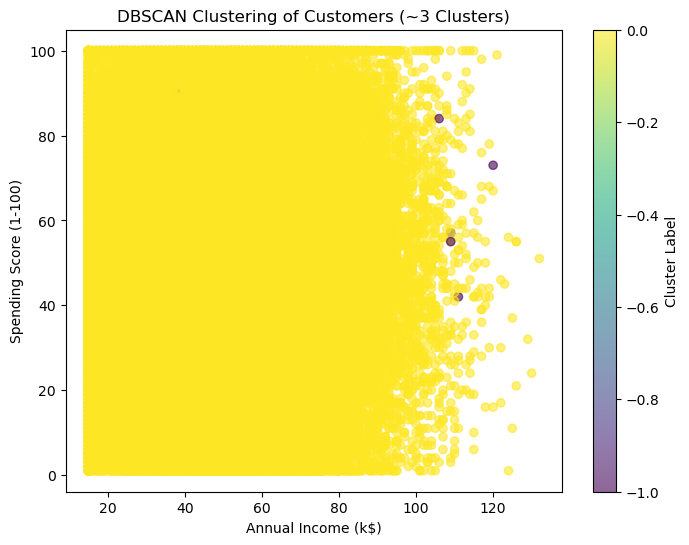

Clustered data saved to 'dbscan_clusters.csv'.


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "Mall_customers.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Drop rows with missing values
df_cleaned = df.dropna().copy()  # Ensure a new copy to avoid warnings

# Selecting numerical features for clustering
features = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)', 'Annual_Spend', 'Visit_Frequency']].values

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN with adjusted parameters (for ~3 clusters)
dbscan = DBSCAN(eps=1.0, min_samples=8)  # Adjusted eps and min_samples
clusters = dbscan.fit_predict(features_scaled)

# Add cluster labels safely
df_cleaned.loc[:, 'Cluster'] = clusters  # Avoids SettingWithCopyWarning

# Visualizing two features: Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Annual Income (k$)'], df_cleaned['Spending Score (1-100)'], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering of Customers (~3 Clusters)")
plt.colorbar(label="Cluster Label")
plt.show()

# Save the clustered data
df_cleaned.to_csv("dbscan_clusters.csv", index=False)
print("Clustered data saved to 'dbscan_clusters.csv'.")


In [76]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for DBSCAN
score = silhouette_score(features_scaled, dbscan.labels_, metric='euclidean')
print("Silhouette Score:", score)

Silhouette Score: 0.46218573149758196


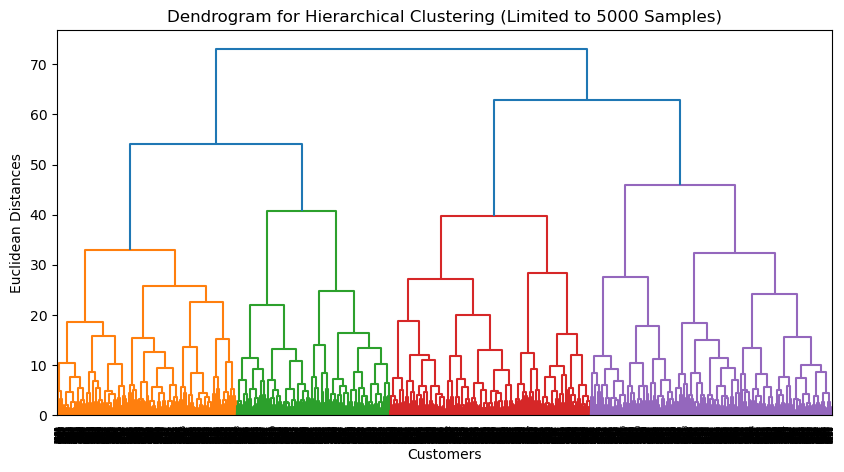

Clustered data saved to 'hierarchical_clusters_sampled.csv'.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "Mall_customers.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop missing values
df_cleaned = df.dropna().copy()

# Selecting relevant numerical features
features = df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)', 'Annual_Spend', 'Visit_Frequency']].values

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ✅ Reduce dataset size to 5000 for clustering to prevent MemoryError
df_sample = df_cleaned.sample(n=min(5000, len(df_cleaned)), random_state=42)
features_sample = df_sample[['Annual Income (k$)', 'Spending Score (1-100)', 'Annual_Spend', 'Visit_Frequency']].values
features_sample_scaled = scaler.transform(features_sample)

# Create Dendrogram (on smaller dataset)
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(features_sample_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering (Limited to 5000 Samples)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Apply Agglomerative Clustering (on reduced dataset)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Changed to 3 clusters as requested
df_sample['Cluster'] = hc.fit_predict(features_sample_scaled)

# Save the clustered data
df_sample.to_csv("hierarchical_clusters_sampled.csv", index=False)
print("Clustered data saved to 'hierarchical_clusters_sampled.csv'.")

In [78]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Mall_customers.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop missing values
df_cleaned = df.dropna().copy()

# Sample a subset of the data to avoid MemoryError
df_sample = df_cleaned.sample(n=10000, random_state=42)  # Reduce if still running out of memory

# Selecting relevant numerical features for clustering
features = df_sample[['Annual Income (k$)', 'Spending Score (1-100)', 'Annual_Spend', 'Visit_Frequency']].values

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply Hierarchical Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_sample['Cluster'] = hc.fit_predict(features_scaled)

# Compute silhouette score for Hierarchical Clustering
silhouette_avg = silhouette_score(features_scaled, df_sample['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Save the clustered data
df_sample.to_csv("hierarchical_clusters_sampled.csv", index=False)
print("Clustered data saved to 'hierarchical_clusters_sampled.csv'.")



Silhouette Score: 0.10471098982503971
Clustered data saved to 'hierarchical_clusters_sampled.csv'.


In [80]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN

# Load dataset
df = pd.read_csv("Mall_customers.csv")

# Encode 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Select only relevant columns
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply DBSCAN Clustering
eps = 0.5  # Adjust based on data
dbscan = DBSCAN(eps=eps, min_samples=5)  # min_samples can also be tuned
df['Cluster'] = dbscan.fit_predict(scaled_features)

# Save the model and scaler
joblib.dump(dbscan, 'dbscan_modell.pkl')
joblib.dump(scaler, 'scalerr.pkl')

print("DBSCAN Model & Scaler Saved Successfully!")



DBSCAN Model & Scaler Saved Successfully!


In [3]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load trained DBSCAN model and scaler
dbscan = joblib.load("dbscan_modell.pkl")
scaler = joblib.load("scalerr.pkl")

# Streamlit UI
st.title("Mall Customer Segmentation App (DBSCAN) 🛍️")
st.markdown("Predict the customer cluster using DBSCAN based on Age, Gender, Income & Spending Score.")

# Sidebar Inputs
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.slider("Age", 18, 70, 25)
income = st.slider("Annual Income (k$)", 10, 150, 50)
spending_score = st.slider("Spending Score (1-100)", 1, 100, 50)

# Convert Gender to numerical value
gender_encoded = 1 if gender == "Male" else 0

# Prepare input data
input_data = np.array([[gender_encoded, age, income, spending_score]])
scaled_input = scaler.transform(input_data)  # Scale input

# Predict Cluster
cluster = dbscan.fit_predict(scaled_input)[0]

# Display Output
st.subheader("Prediction Result 🎯")
if cluster == -1:
    st.write("The customer is classified as **Noise** (not assigned to any cluster).")
else:
    st.write(f"The customer belongs to **Cluster {cluster}**")

# Add explanations
st.markdown("""
### Cluster Meanings (Example Interpretation):
- **Cluster 0**: Low spenders, low income
- **Cluster 1**: Moderate spenders, middle-class
- **Cluster 2**: High spenders, high income

(DBSCAN does not always form the same number of clusters; interpretation may vary.)
""")



2025-03-27 20:44:44.481 
  command:

    streamlit run C:\Users\Lenovo\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-27 20:44:44.484 Session state does not function when running a script without `streamlit run`
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


DeltaGenerator()

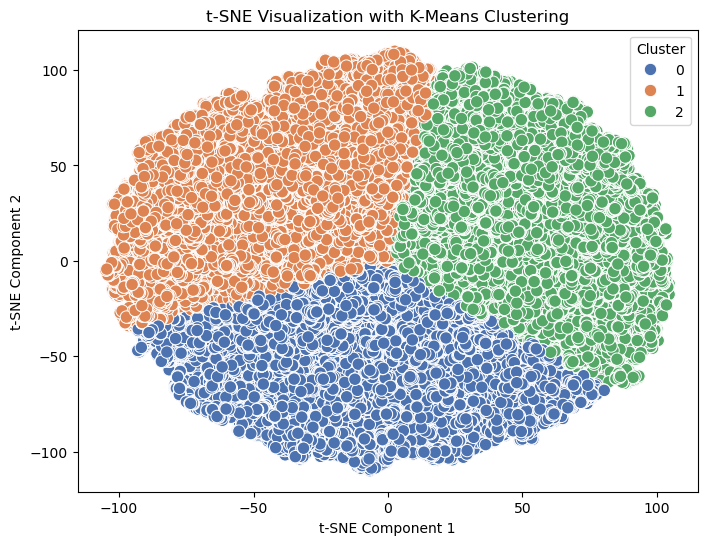

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load your dataset (Replace 'your_data.csv' with your actual file)
df = pd.read_csv("Mall_customers.csv")

# Step 2: Preprocess Data
# Assuming the dataset has a mix of numerical & categorical data
df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
df = df.dropna()  # Remove missing values if any

# Step 3: Standardize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 4: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 5: Apply K-Means Clustering
n_clusters = 3  # Change this based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tsne)

# Step 6: Visualize the Clusters
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="deep", s=80)
plt.title("t-SNE Visualization with K-Means Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()
